# Chapter 11: Time Series

In [2]:
import numpy as np
import pandas as pd

## 11.1: Date and Time Data Types and Tools

In [3]:
from datetime import datetime

In [4]:
now=datetime.now()
now

datetime.datetime(2024, 7, 16, 14, 12, 56, 541155)

In [5]:
now.year,now.month,now.day

(2024, 7, 16)

In [6]:
delta=datetime(2011,1,7)-datetime(2008,6,24,7,15)
delta

datetime.timedelta(days=926, seconds=60300)

In [7]:
delta.days

926

In [8]:
delta.seconds

60300

In [9]:
from datetime import timedelta

In [10]:
start=datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [11]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [13]:
stamp=datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [16]:
value="2011-01-03"
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs=["7/6/2011","8/6/2011"]
[datetime.strptime(x,"%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [18]:
datestrs=["2011-07-06 12:00:00","2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [21]:
pd.isna(idx)

array([False, False,  True])

## 11.2: Time Series Basics

In [22]:
dates=[datetime(2011,1,2),datetime(2011,1,5),
       datetime(2011,1,7),datetime(2011,1,8),
       datetime(2011,1,10),datetime(2011,1,12)]

ts=pd.Series(np.random.standard_normal(6),index=dates)#

ts

2011-01-02   -2.174127
2011-01-05   -1.260592
2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
2011-01-12   -0.327515
dtype: float64

In [23]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [24]:
ts+ts[::2]

2011-01-02   -4.348254
2011-01-05         NaN
2011-01-07    1.077034
2011-01-08         NaN
2011-01-10    6.641347
2011-01-12         NaN
dtype: float64

In [25]:
ts.index.dtype

dtype('<M8[ns]')

In [26]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [27]:
stamp=ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [28]:
ts[stamp]

0.5385169471213266

In [29]:
ts["2011-01-10"]

3.3206733622732556

In [30]:
longer_ts=pd.Series(np.random.standard_normal(1000),index=pd.date_range("2000-01-01",periods=1000))
longer_ts

2000-01-01    2.181642
2000-01-02   -0.595923
2000-01-03    0.019051
2000-01-04   -1.270693
2000-01-05    1.265279
                ...   
2002-09-22   -0.537772
2002-09-23    0.595114
2002-09-24   -1.244387
2002-09-25    0.439767
2002-09-26   -0.682020
Freq: D, Length: 1000, dtype: float64

In [31]:
longer_ts["2001"]

2001-01-01    0.305503
2001-01-02    0.135092
2001-01-03    0.057606
2001-01-04    0.547052
2001-01-05    0.251495
                ...   
2001-12-27   -0.358211
2001-12-28   -0.341355
2001-12-29    0.303146
2001-12-30    1.810173
2001-12-31    0.954941
Freq: D, Length: 365, dtype: float64

(array([ 18.,  41., 141., 224., 253., 182.,  94.,  39.,   6.,   2.]),
 array([-2.76658124, -2.1320025 , -1.49742376, -0.86284502, -0.22826628,
         0.40631246,  1.0408912 ,  1.67546994,  2.31004868,  2.94462742,
         3.57920616]),
 <BarContainer object of 10 artists>)

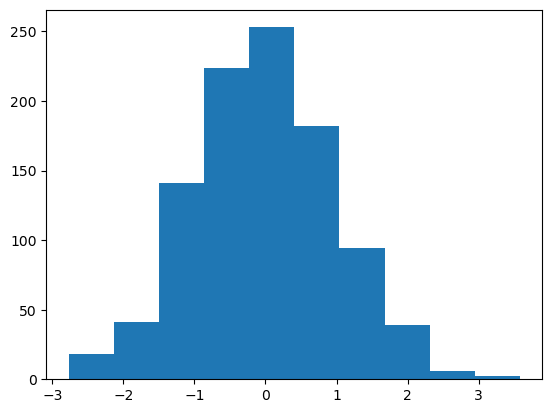

In [32]:
from matplotlib.pyplot import hist


hist(longer_ts)

In [33]:
longer_ts["2001-05"]

2001-05-01   -0.292098
2001-05-02   -0.434797
2001-05-03    1.181015
2001-05-04   -1.097561
2001-05-05    0.893470
2001-05-06   -0.222385
2001-05-07    0.686771
2001-05-08    1.019883
2001-05-09   -0.264995
2001-05-10   -0.512972
2001-05-11    0.066284
2001-05-12   -1.953823
2001-05-13    0.309903
2001-05-14    0.950663
2001-05-15    0.591149
2001-05-16    0.912832
2001-05-17    0.253865
2001-05-18   -1.113607
2001-05-19   -1.771299
2001-05-20   -1.054074
2001-05-21   -2.422523
2001-05-22   -0.643158
2001-05-23   -0.750776
2001-05-24    0.005389
2001-05-25   -0.428446
2001-05-26   -0.774384
2001-05-27   -1.615551
2001-05-28    0.565709
2001-05-29   -0.540341
2001-05-30    0.219797
2001-05-31   -2.495652
Freq: D, dtype: float64

In [34]:
ts

2011-01-02   -2.174127
2011-01-05   -1.260592
2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
2011-01-12   -0.327515
dtype: float64

In [35]:
ts[datetime(2011,1,7):]

2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
2011-01-12   -0.327515
dtype: float64

In [36]:
ts[datetime(2011,1,7):datetime(2011,1,10)]

2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
dtype: float64

In [37]:
ts

2011-01-02   -2.174127
2011-01-05   -1.260592
2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
2011-01-12   -0.327515
dtype: float64

In [38]:
ts["2011-01-06":"2011-01-11"]

2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
dtype: float64

In [39]:
ts.truncate(after="2011-01-09")

2011-01-02   -2.174127
2011-01-05   -1.260592
2011-01-07    0.538517
2011-01-08    0.087854
dtype: float64

In [40]:
dates=pd.date_range("2000-01-01",periods=100,freq="W-WED")
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [41]:
long_df=pd.DataFrame(np.random.standard_normal((100,4)),index=dates,columns=["Colorado","Texas","New York","Ohio"])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.765201,-1.031163,-2.883741,0.119013
2000-01-12,2.983049,0.045117,-0.845672,-0.993144
2000-01-19,-1.939631,-0.402102,2.132490,0.458087
2000-01-26,-1.060509,1.586706,-0.793459,-0.209657
2000-02-02,1.624055,0.572773,-1.189393,0.238057
...,...,...,...,...
2001-10-31,0.566986,0.177513,-2.194688,0.000002
2001-11-07,-0.663683,0.925152,-1.220278,-0.656964
2001-11-14,1.048152,2.787553,-0.103016,0.194884
2001-11-21,2.090039,-0.142630,0.429294,-1.537509


In [42]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.063379,0.250781,0.549495,-1.325335
2001-05-09,1.438709,0.622830,1.031851,0.138696
2001-05-16,-0.247528,0.567271,-0.777306,-0.036151
2001-05-23,0.799949,-0.331348,-2.635089,0.813165
2001-05-30,1.466734,0.138891,-0.418955,1.313323


### Time Series with Duplicate Indices

In [43]:
dates=pd.DatetimeIndex(["2000-01-01","2000-01-02","2000-01-02","2000-01-02","2000-01-03"])
dup_ts=pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [44]:
dup_ts.index.is_unique

False

In [45]:
dup_ts["2000-01-03"]

4

In [46]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [47]:
grouped=dup_ts.groupby(level=0)
list(grouped)

[(Timestamp('2000-01-01 00:00:00'),
  2000-01-01    0
  dtype: int32),
 (Timestamp('2000-01-02 00:00:00'),
  2000-01-02    1
  2000-01-02    2
  2000-01-02    3
  dtype: int32),
 (Timestamp('2000-01-03 00:00:00'),
  2000-01-03    4
  dtype: int32)]

In [48]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [49]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3: Date Ranges, Frequencies, and Shifting

In [50]:
ts

2011-01-02   -2.174127
2011-01-05   -1.260592
2011-01-07    0.538517
2011-01-08    0.087854
2011-01-10    3.320673
2011-01-12   -0.327515
dtype: float64

In [51]:
resampler=ts.resample("D")
resampler

In [52]:
list(resampler)

[(Timestamp('2011-01-02 00:00:00'),
  2011-01-02   -2.174127
  dtype: float64),
 (Timestamp('2011-01-03 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-04 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-05 00:00:00'),
  2011-01-05   -1.260592
  dtype: float64),
 (Timestamp('2011-01-06 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-07 00:00:00'),
  2011-01-07    0.538517
  dtype: float64),
 (Timestamp('2011-01-08 00:00:00'),
  2011-01-08    0.087854
  dtype: float64),
 (Timestamp('2011-01-09 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-10 00:00:00'),
  2011-01-10    3.320673
  dtype: float64),
 (Timestamp('2011-01-11 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-12 00:00:00'),
  2011-01-12   -0.327515
  dtype: float64)]

### Generating Date Ranges

In [53]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [54]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range("2024-01-07", "2024-12-07", freq="BM")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\713657161.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2024-01-07", "2024-12-07", freq="BM")


DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-29', '2024-04-30',
               '2024-05-31', '2024-06-28', '2024-07-31', '2024-08-30',
               '2024-09-30', '2024-10-31', '2024-11-29'],
              dtype='datetime64[ns]', freq='BME')

In [57]:
pd.date_range("2012-05-02 12:56:31", periods=5)


DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [59]:
from pandas.tseries.offsets import Hour,Minute

In [60]:
hour=Hour()

In [61]:
hour

<Hour>

In [62]:
four_hours=Hour(4)
four_hours

<4 * Hours>

In [63]:
pd.date_range("2000-01-01","2000-01-03 23:59",freq="4H")


C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\4288980852.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01","2000-01-03 23:59",freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [64]:
Hour(2)+Minute(30)

<150 * Minutes>

In [65]:
pd.date_range("2000-01-01",periods=10,freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### Week of month dates

In [66]:
monthly_dates=pd.date_range("2024-01-01","2024-12-31",freq="WOM-3Fri")
monthly_dates

DatetimeIndex(['2024-01-19', '2024-02-16', '2024-03-15', '2024-04-19',
               '2024-05-17', '2024-06-21', '2024-07-19', '2024-08-16',
               '2024-09-20', '2024-10-18', '2024-11-15', '2024-12-20'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

In [67]:
ts=pd.Series(np.random.standard_normal(4),index=pd.date_range("2000-01-01",periods=4,freq="M"))
ts

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\4197551884.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts=pd.Series(np.random.standard_normal(4),index=pd.date_range("2000-01-01",periods=4,freq="M"))


2000-01-31   -0.963112
2000-02-29   -0.618435
2000-03-31   -0.974297
2000-04-30    0.507594
Freq: ME, dtype: float64

In [68]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.963112
2000-04-30   -0.618435
Freq: ME, dtype: float64

In [69]:
ts.shift(-2)

2000-01-31   -0.974297
2000-02-29    0.507594
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [70]:
ts/ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.357879
2000-03-31    0.575425
2000-04-30   -1.520985
Freq: ME, dtype: float64

In [71]:
ts
ts.shift(1)

2000-01-31   -0.963112
2000-02-29   -0.618435
2000-03-31   -0.974297
2000-04-30    0.507594
Freq: ME, dtype: float64

2000-01-31         NaN
2000-02-29   -0.963112
2000-03-31   -0.618435
2000-04-30   -0.974297
Freq: ME, dtype: float64

In [72]:
0.33/1.74

0.18965517241379312

In [73]:
ts.shift(2,freq="M")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\500384683.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2,freq="M")


2000-03-31   -0.963112
2000-04-30   -0.618435
2000-05-31   -0.974297
2000-06-30    0.507594
Freq: ME, dtype: float64

In [74]:
ts.shift(3,freq="D")

2000-02-03   -0.963112
2000-03-03   -0.618435
2000-04-03   -0.974297
2000-05-03    0.507594
dtype: float64

In [75]:
ts.shift(1, freq="90T")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\584021106.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2000-01-31 01:30:00   -0.963112
2000-02-29 01:30:00   -0.618435
2000-03-31 01:30:00   -0.974297
2000-04-30 01:30:00    0.507594
dtype: float64

#### Shifting dates with offsets

In [76]:
from pandas.tseries.offsets import Day, MonthEnd

In [77]:
now=datetime(2011,11,17)

In [78]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [79]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [80]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [81]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [82]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [83]:
ts=pd.Series(np.random.standard_normal(20),index=pd.date_range("2000-01-15",periods=20,freq="4D"))
ts

2000-01-15    1.301491
2000-01-19    0.118570
2000-01-23   -0.053549
2000-01-27   -1.208140
2000-01-31    1.694279
2000-02-04   -1.756362
2000-02-08   -1.933509
2000-02-12    0.916783
2000-02-16    1.174734
2000-02-20    0.058199
2000-02-24   -1.091957
2000-02-28   -0.112323
2000-03-03   -0.772445
2000-03-07   -0.966562
2000-03-11    0.478715
2000-03-15   -0.720274
2000-03-19    0.743273
2000-03-23    0.985848
2000-03-27   -0.941171
2000-03-31   -1.084400
Freq: 4D, dtype: float64

In [84]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.370530
2000-02-29   -0.392062
2000-03-31   -0.284627
dtype: float64

In [85]:
ts.resample("M").mean()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31    0.370530
2000-02-29   -0.392062
2000-03-31   -0.284627
Freq: ME, dtype: float64

## 11.4: Time Zone Handling

In [86]:
import pytz

In [87]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [88]:
tz=pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [89]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
dates

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [90]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00   -0.026122
2012-03-10 09:30:00   -1.869592
2012-03-11 09:30:00    0.096935
2012-03-12 09:30:00   -0.526714
2012-03-13 09:30:00   -0.831262
2012-03-14 09:30:00    1.615726
Freq: D, dtype: float64

In [91]:
print(ts.index.tz)

None


In [92]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [93]:
ts_utc=ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00   -0.026122
2012-03-10 09:30:00+00:00   -1.869592
2012-03-11 09:30:00+00:00    0.096935
2012-03-12 09:30:00+00:00   -0.526714
2012-03-13 09:30:00+00:00   -0.831262
2012-03-14 09:30:00+00:00    1.615726
Freq: D, dtype: float64

In [94]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [95]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -0.026122
2012-03-10 04:30:00-05:00   -1.869592
2012-03-11 05:30:00-04:00    0.096935
2012-03-12 05:30:00-04:00   -0.526714
2012-03-13 05:30:00-04:00   -0.831262
2012-03-14 05:30:00-04:00    1.615726
Freq: D, dtype: float64

In [96]:
ts_utc.tz_convert("Europe/London")

2012-03-09 09:30:00+00:00   -0.026122
2012-03-10 09:30:00+00:00   -1.869592
2012-03-11 09:30:00+00:00    0.096935
2012-03-12 09:30:00+00:00   -0.526714
2012-03-13 09:30:00+00:00   -0.831262
2012-03-14 09:30:00+00:00    1.615726
Freq: D, dtype: float64

In [97]:
ts

2012-03-09 09:30:00   -0.026122
2012-03-10 09:30:00   -1.869592
2012-03-11 09:30:00    0.096935
2012-03-12 09:30:00   -0.526714
2012-03-13 09:30:00   -0.831262
2012-03-14 09:30:00    1.615726
Freq: D, dtype: float64

In [98]:
ts_eastern=ts.tz_localize("America/New_York")
ts_eastern

2012-03-09 09:30:00-05:00   -0.026122
2012-03-10 09:30:00-05:00   -1.869592
2012-03-11 09:30:00-04:00    0.096935
2012-03-12 09:30:00-04:00   -0.526714
2012-03-13 09:30:00-04:00   -0.831262
2012-03-14 09:30:00-04:00    1.615726
dtype: float64

In [99]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -0.026122
2012-03-10 14:30:00+00:00   -1.869592
2012-03-11 13:30:00+00:00    0.096935
2012-03-12 13:30:00+00:00   -0.526714
2012-03-13 13:30:00+00:00   -0.831262
2012-03-14 13:30:00+00:00    1.615726
dtype: float64

In [100]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -0.026122
2012-03-10 15:30:00+01:00   -1.869592
2012-03-11 14:30:00+01:00    0.096935
2012-03-12 14:30:00+01:00   -0.526714
2012-03-13 14:30:00+01:00   -0.831262
2012-03-14 14:30:00+01:00    1.615726
dtype: float64

In [101]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operatiosn with Time Zone-Aware Timestamp Objects

In [102]:
stamp=pd.Timestamp("2011-03-12 04:00")
stamp

Timestamp('2011-03-12 04:00:00')

In [103]:
stamp_utz=stamp.tz_localize("UTC")

In [104]:
stamp_utz

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [105]:
stamp_utz.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [106]:
stamp_moscow=pd.Timestamp("2011-03-12 04:00",tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [107]:
stamp_utz.value

1299902400000000000

In [108]:
stamp_utz.tz_convert("America/New_York").value

1299902400000000000

In [109]:
stamp=pd.Timestamp("2012-03-11 1:30",tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [110]:
stamp+Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [111]:
stamp=pd.Timestamp("2012-11-04 00:30",tz="US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [112]:
stamp.month

11

In [113]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [114]:
dates=pd.date_range("2012-03-07 09:30",periods=10,freq="B")
dates

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [115]:
ts=pd.Series(np.random.standard_normal(len(dates)),index=dates)
ts

2012-03-07 09:30:00    1.326746
2012-03-08 09:30:00    1.173905
2012-03-09 09:30:00   -0.598344
2012-03-12 09:30:00    0.584619
2012-03-13 09:30:00   -0.331163
2012-03-14 09:30:00    1.174107
2012-03-15 09:30:00   -0.736962
2012-03-16 09:30:00    0.311686
2012-03-19 09:30:00    0.007123
2012-03-20 09:30:00    0.642459
Freq: B, dtype: float64

In [116]:
ts1=ts[:7].tz_localize("Europe/London")
ts2=ts[2:].tz_localize("Europe/Moscow")
ts1
ts2

2012-03-07 09:30:00+00:00    1.326746
2012-03-08 09:30:00+00:00    1.173905
2012-03-09 09:30:00+00:00   -0.598344
2012-03-12 09:30:00+00:00    0.584619
2012-03-13 09:30:00+00:00   -0.331163
2012-03-14 09:30:00+00:00    1.174107
2012-03-15 09:30:00+00:00   -0.736962
dtype: float64

2012-03-09 09:30:00+04:00   -0.598344
2012-03-12 09:30:00+04:00    0.584619
2012-03-13 09:30:00+04:00   -0.331163
2012-03-14 09:30:00+04:00    1.174107
2012-03-15 09:30:00+04:00   -0.736962
2012-03-16 09:30:00+04:00    0.311686
2012-03-19 09:30:00+04:00    0.007123
2012-03-20 09:30:00+04:00    0.642459
dtype: float64

In [117]:
result=ts1+ts2
result
result.index

2012-03-07 09:30:00+00:00   NaN
2012-03-08 09:30:00+00:00   NaN
2012-03-09 05:30:00+00:00   NaN
2012-03-09 09:30:00+00:00   NaN
2012-03-12 05:30:00+00:00   NaN
2012-03-12 09:30:00+00:00   NaN
2012-03-13 05:30:00+00:00   NaN
2012-03-13 09:30:00+00:00   NaN
2012-03-14 05:30:00+00:00   NaN
2012-03-14 09:30:00+00:00   NaN
2012-03-15 05:30:00+00:00   NaN
2012-03-15 09:30:00+00:00   NaN
2012-03-16 05:30:00+00:00   NaN
2012-03-19 05:30:00+00:00   NaN
2012-03-20 05:30:00+00:00   NaN
dtype: float64

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 05:30:00+00:00', '2012-03-09 09:30:00+00:00',
               '2012-03-12 05:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 05:30:00+00:00', '2012-03-13 09:30:00+00:00',
               '2012-03-14 05:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 05:30:00+00:00', '2012-03-15 09:30:00+00:00',
               '2012-03-16 05:30:00+00:00', '2012-03-19 05:30:00+00:00',
               '2012-03-20 05:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [118]:
ts1

2012-03-07 09:30:00+00:00    1.326746
2012-03-08 09:30:00+00:00    1.173905
2012-03-09 09:30:00+00:00   -0.598344
2012-03-12 09:30:00+00:00    0.584619
2012-03-13 09:30:00+00:00   -0.331163
2012-03-14 09:30:00+00:00    1.174107
2012-03-15 09:30:00+00:00   -0.736962
dtype: float64

In [119]:
ts2

2012-03-09 09:30:00+04:00   -0.598344
2012-03-12 09:30:00+04:00    0.584619
2012-03-13 09:30:00+04:00   -0.331163
2012-03-14 09:30:00+04:00    1.174107
2012-03-15 09:30:00+04:00   -0.736962
2012-03-16 09:30:00+04:00    0.311686
2012-03-19 09:30:00+04:00    0.007123
2012-03-20 09:30:00+04:00    0.642459
dtype: float64

In [120]:
ts1

2012-03-07 09:30:00+00:00    1.326746
2012-03-08 09:30:00+00:00    1.173905
2012-03-09 09:30:00+00:00   -0.598344
2012-03-12 09:30:00+00:00    0.584619
2012-03-13 09:30:00+00:00   -0.331163
2012-03-14 09:30:00+00:00    1.174107
2012-03-15 09:30:00+00:00   -0.736962
dtype: float64

In [121]:
ts3=ts1.tz_convert("Europe/Moscow")
ts3

2012-03-07 13:30:00+04:00    1.326746
2012-03-08 13:30:00+04:00    1.173905
2012-03-09 13:30:00+04:00   -0.598344
2012-03-12 13:30:00+04:00    0.584619
2012-03-13 13:30:00+04:00   -0.331163
2012-03-14 13:30:00+04:00    1.174107
2012-03-15 13:30:00+04:00   -0.736962
dtype: float64

In [122]:
ts1+ts3

2012-03-07 09:30:00+00:00    2.653492
2012-03-08 09:30:00+00:00    2.347810
2012-03-09 09:30:00+00:00   -1.196688
2012-03-12 09:30:00+00:00    1.169238
2012-03-13 09:30:00+00:00   -0.662326
2012-03-14 09:30:00+00:00    2.348214
2012-03-15 09:30:00+00:00   -1.473925
dtype: float64

## 11.5: Periods and Period Arithemtic

In [123]:
p=pd.Period("2011",freq="A-DEC")
p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\2895720356.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p=pd.Period("2011",freq="A-DEC")


Period('2011', 'Y-DEC')

In [124]:
p+5

Period('2016', 'Y-DEC')

In [125]:
p-2

Period('2009', 'Y-DEC')

In [126]:
pd.Period("2014",freq="A-DEC")-p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1575718699.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2014",freq="A-DEC")-p


<3 * YearEnds: month=12>

In [127]:
periods=pd.period_range("2000-01-01","2000-06-30",freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [128]:
pd.Series(np.random.standard_normal(6),index=periods)

2000-01    0.314338
2000-02    0.773571
2000-03   -0.429520
2000-04   -0.322948
2000-05    0.270903
2000-06    1.535240
Freq: M, dtype: float64

In [129]:
values=["2001Q3","2002Q2","2003Q1"]
index=pd.PeriodIndex(values,freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [130]:
p=pd.Period("2011",freq="A-DEC")
p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\2895720356.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p=pd.Period("2011",freq="A-DEC")


Period('2011', 'Y-DEC')

In [131]:
p.asfreq("M",how="start")

Period('2011-01', 'M')

In [132]:
p.asfreq("M",how="end")
p.asfreq("M")

Period('2011-12', 'M')

Period('2011-12', 'M')

In [133]:
p=pd.Period("2011",freq="A-JUN")
p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1912720791.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p=pd.Period("2011",freq="A-JUN")


Period('2011', 'Y-JUN')

In [134]:
p.asfreq("M",how="start")

Period('2010-07', 'M')

In [135]:
p.asfreq("M",how="end")

Period('2011-06', 'M')

In [136]:
p=pd.Period("Aug-2011","M")
p

Period('2011-08', 'M')

In [137]:
p.asfreq("A-JUN")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1565973874.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq("A-JUN")


Period('2012', 'Y-JUN')

In [138]:
periods=pd.period_range("2006","2009",freq="A-DEC")
periods
ts=pd.Series(np.random.standard_normal(len(periods)),index=periods)
ts

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\3530006165.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  periods=pd.period_range("2006","2009",freq="A-DEC")


PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[Y-DEC]')

2006   -0.042217
2007   -0.122270
2008   -0.319421
2009    0.855549
Freq: Y-DEC, dtype: float64

In [139]:
ts.asfreq("M",how="start")

2006-01   -0.042217
2007-01   -0.122270
2008-01   -0.319421
2009-01    0.855549
Freq: M, dtype: float64

In [140]:
ts.asfreq("B", how="end")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29   -0.042217
2007-12-31   -0.122270
2008-12-31   -0.319421
2009-12-31    0.855549
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [141]:
p=pd.Period("2012Q4",freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [142]:
p.asfreq("D",how="start")
p.asfreq("D",how="end")

Period('2011-11-01', 'D')

Period('2012-01-31', 'D')

In [143]:
p4pm=(p.asfreq("B",how="end")-1).asfreq("T",how="start")+16*60
p4pm

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\188624859.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm=(p.asfreq("B",how="end")-1).asfreq("T",how="start")+16*60
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\188624859.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm=(p.asfreq("B",how="end")-1).asfreq("T",how="start")+16*60


Period('2012-01-30 16:00', 'min')

In [144]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [145]:
periods=pd.period_range("2011Q3","2012Q4",freq="Q-JAN")
periods
ts=pd.Series(np.arange(len(periods)),index=periods)
ts

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]')

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [146]:
new_periods=(periods.asfreq("B","end")-1).asfreq("H","start")+16
new_periods

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\3834177746.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods=(periods.asfreq("B","end")-1).asfreq("H","start")+16
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\3834177746.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods=(periods.asfreq("B","end")-1).asfreq("H","start")+16


PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[h]')

In [147]:
ts.index=new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [149]:
dates=pd.date_range("2000-01-01",periods=3,freq="M")
dates

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\3566166527.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range("2000-01-01",periods=3,freq="M")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='ME')

In [150]:
ts=pd.Series(np.random.standard_normal(3),index=dates)
ts

2000-01-31   -1.375190
2000-02-29   -1.017602
2000-03-31    0.674026
Freq: ME, dtype: float64

In [151]:
pts=ts.to_period()
pts

2000-01   -1.375190
2000-02   -1.017602
2000-03    0.674026
Freq: M, dtype: float64

In [152]:
dates=pd.date_range("2000-01-29",periods=6)
dates

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [153]:
ts2=pd.Series(np.random.standard_normal(6),index=dates)
ts2

2000-01-29    1.024947
2000-01-30    0.488090
2000-01-31   -1.003460
2000-02-01    0.307618
2000-02-02   -0.612616
2000-02-03    1.898003
Freq: D, dtype: float64

In [156]:
ts2.to_period("M")

2000-01    1.024947
2000-01    0.488090
2000-01   -1.003460
2000-02    0.307618
2000-02   -0.612616
2000-02    1.898003
Freq: M, dtype: float64

In [157]:
pts=ts2.to_period()
pts

2000-01-29    1.024947
2000-01-30    0.488090
2000-01-31   -1.003460
2000-02-01    0.307618
2000-02-02   -0.612616
2000-02-03    1.898003
Freq: D, dtype: float64

In [159]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999    1.024947
2000-01-30 23:59:59.999999999    0.488090
2000-01-31 23:59:59.999999999   -1.003460
2000-02-01 23:59:59.999999999    0.307618
2000-02-02 23:59:59.999999999   -0.612616
2000-02-03 23:59:59.999999999    1.898003
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [160]:
data=pd.read_csv("../../examples/macrodata.csv")
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [162]:
data["year"]
data["quarter"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [163]:
index=pd.PeriodIndex(year=data["year"],quarter=data["quarter"],freq="Q-DEC")
index

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\2540273463.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index=pd.PeriodIndex(year=data["year"],quarter=data["quarter"],freq="Q-DEC")


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [164]:
data.index=index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 11.6: Resampling and Frequency Conversion

In [165]:
dates=pd.date_range("2000-01-01",periods=100)
ts=pd.Series(np.random.standard_exponential(len(dates)),index=dates)
ts

2000-01-01    1.033364
2000-01-02    1.984414
2000-01-03    2.215885
2000-01-04    0.889402
2000-01-05    0.322248
                ...   
2000-04-05    0.618569
2000-04-06    0.205792
2000-04-07    0.150784
2000-04-08    1.360302
2000-04-09    1.911097
Freq: D, Length: 100, dtype: float64

In [168]:
list(ts.resample("M"))

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1646755030.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  list(ts.resample("M"))


[(Timestamp('2000-01-31 00:00:00'),
  2000-01-01    1.033364
  2000-01-02    1.984414
  2000-01-03    2.215885
  2000-01-04    0.889402
  2000-01-05    0.322248
  2000-01-06    0.338992
  2000-01-07    1.777483
  2000-01-08    1.455160
  2000-01-09    0.410293
  2000-01-10    1.154960
  2000-01-11    0.824219
  2000-01-12    0.361688
  2000-01-13    0.258519
  2000-01-14    0.294406
  2000-01-15    1.002579
  2000-01-16    0.454740
  2000-01-17    2.302824
  2000-01-18    2.251335
  2000-01-19    0.408380
  2000-01-20    0.975443
  2000-01-21    0.387748
  2000-01-22    0.274260
  2000-01-23    0.579138
  2000-01-24    0.481909
  2000-01-25    0.225717
  2000-01-26    0.373166
  2000-01-27    0.649496
  2000-01-28    0.696974
  2000-01-29    0.476810
  2000-01-30    0.078282
  2000-01-31    0.850295
  Freq: D, dtype: float64),
 (Timestamp('2000-02-29 00:00:00'),
  2000-02-01    0.780111
  2000-02-02    0.048005
  2000-02-03    0.336808
  2000-02-04    0.076070
  2000-02-05    0.649640


In [169]:
ts.resample("M").mean()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31    0.831940
2000-02-29    1.049026
2000-03-31    0.952113
2000-04-30    0.795914
Freq: ME, dtype: float64

In [171]:
ts.resample("M",kind="period").mean()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1068419221.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M",kind="period").mean()
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1068419221.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M",kind="period").mean()


2000-01    0.831940
2000-02    1.049026
2000-03    0.952113
2000-04    0.795914
Freq: M, dtype: float64

### Downsampling

In [172]:
dates=pd.date_range("2000-01-01",periods=12,freq="T")
ts=pd.Series(np.arange(len(dates)),index=dates)
ts

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\69179165.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates=pd.date_range("2000-01-01",periods=12,freq="T")


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int32

In [173]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int32

In [175]:
ts.resample("5min",closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int32

In [176]:
ts.resample("5min",closed="right",label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int32

In [178]:
from pandas.tseries.frequencies import to_offset
result=ts.resample("5min",closed="right",label="right").sum()
result

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int32

In [179]:
result.index=result.index+to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int32

In [180]:
ts=pd.Series(np.random.permutation(np.arange(len(dates))),index=dates)
ts

2000-01-01 00:00:00     5
2000-01-01 00:01:00    10
2000-01-01 00:02:00     4
2000-01-01 00:03:00     0
2000-01-01 00:04:00     3
2000-01-01 00:05:00     9
2000-01-01 00:06:00     1
2000-01-01 00:07:00     2
2000-01-01 00:08:00     8
2000-01-01 00:09:00    11
2000-01-01 00:10:00     7
2000-01-01 00:11:00     6
Freq: min, dtype: int32

In [182]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,5,10,0,3
2000-01-01 00:05:00,9,11,1,11
2000-01-01 00:10:00,7,7,6,6


### Upsampling and Interpolation

In [183]:
frame=pd.DataFrame(np.random.standard_normal((2,4)),index=pd.date_range("2000-01-01",periods=2,freq="W-WED"),columns=["Colorado","Texas","New York","Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.696810,0.352901,0.273623,-0.079166
2000-01-12,0.414664,-1.308809,2.073441,-0.177248


In [185]:
df_daily=frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.696810,0.352901,0.273623,-0.079166
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.414664,-1.308809,2.073441,-0.177248


In [186]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.696810,0.352901,0.273623,-0.079166
2000-01-06,0.696810,0.352901,0.273623,-0.079166
2000-01-07,0.696810,0.352901,0.273623,-0.079166
2000-01-08,0.696810,0.352901,0.273623,-0.079166
2000-01-09,0.696810,0.352901,0.273623,-0.079166
2000-01-10,0.696810,0.352901,0.273623,-0.079166
2000-01-11,0.696810,0.352901,0.273623,-0.079166
2000-01-12,0.414664,-1.308809,2.073441,-0.177248


In [187]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.696810,0.352901,0.273623,-0.079166
2000-01-06,0.696810,0.352901,0.273623,-0.079166
2000-01-07,0.696810,0.352901,0.273623,-0.079166
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.414664,-1.308809,2.073441,-0.177248


In [189]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.696810,0.352901,0.273623,-0.079166
2000-01-13,0.414664,-1.308809,2.073441,-0.177248


### Resampling with periods

In [193]:
frame=pd.DataFrame(np.random.standard_normal((24,4)),
                   index=pd.period_range("1-2000","12-2001",freq="M"),
                   columns=["Colorado","Texas","New York","Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.133067,0.956161,-0.587717,-0.442652
2000-02,-0.060672,-1.069355,0.021707,1.065997
2000-03,-0.068107,-0.415859,-1.336332,0.938084
2000-04,-0.288546,-0.201260,-0.874198,0.489496
2000-05,2.274929,1.995051,1.525473,0.690990
2000-06,-1.425556,1.152334,-0.594412,-0.938373
2000-07,-0.915140,-0.510017,-0.376448,0.509762
2000-08,1.088334,-1.177775,-1.264891,1.610771
2000-09,0.969249,0.718174,-1.364890,0.902926
2000-10,0.508549,-1.465636,0.847708,-0.473475


In [195]:
annual_frame=frame.resample("A-DEC").mean()
annual_frame

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1869618714.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame=frame.resample("A-DEC").mean()
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1869618714.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame=frame.resample("A-DEC").mean()


,Colorado,Texas,New York,Ohio
2000,0.116281,-0.084398,-0.408279,0.280411
2001,0.460902,0.059142,0.244831,0.175026


In [196]:
annual_frame.resample("Q-DEC").ffill()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\398839002.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.116281,-0.084398,-0.408279,0.280411
2000Q2,0.116281,-0.084398,-0.408279,0.280411
2000Q3,0.116281,-0.084398,-0.408279,0.280411
2000Q4,0.116281,-0.084398,-0.408279,0.280411
2001Q1,0.460902,0.059142,0.244831,0.175026
2001Q2,0.460902,0.059142,0.244831,0.175026
2001Q3,0.460902,0.059142,0.244831,0.175026
2001Q4,0.460902,0.059142,0.244831,0.175026


In [198]:
annual_frame.resample("Q-DEC",convention="end").asfreq()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1386125193.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC",convention="end").asfreq()
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\1386125193.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC",convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,0.116281,-0.084398,-0.408279,0.280411
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.460902,0.059142,0.244831,0.175026


In [199]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.116281,-0.084398,-0.408279,0.280411
2001,0.460902,0.059142,0.244831,0.175026


In [200]:
annual_frame.resample("Q-MAR").ffill()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_2192\70909838.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.116281,-0.084398,-0.408279,0.280411
2001Q1,0.116281,-0.084398,-0.408279,0.280411
2001Q2,0.116281,-0.084398,-0.408279,0.280411
2001Q3,0.116281,-0.084398,-0.408279,0.280411
2001Q4,0.460902,0.059142,0.244831,0.175026
2002Q1,0.460902,0.059142,0.244831,0.175026
2002Q2,0.460902,0.059142,0.244831,0.175026
2002Q3,0.460902,0.059142,0.244831,0.175026


### Grouped Time Resampling

In [201]:
N=15

In [202]:
times=pd.date_range("2017-05-20 00:00",freq="1min",periods=N)
df=pd.DataFrame({"time":times,"value":np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [203]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [204]:
df2=pd.DataFrame({"time":times.repeat(3),
                  "key":np.tile(["a","b","c"],N),
                  "value":np.arange(N*3.)})
df2

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0
7,2017-05-20 00:02:00,b,7.0
8,2017-05-20 00:02:00,c,8.0
9,2017-05-20 00:03:00,a,9.0


In [205]:
time_key=pd.Grouper(freq="5min")
time_key

TimeGrouper(freq=<5 * Minutes>, axis=0, sort=True, dropna=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

In [207]:
resampled=(df2.set_index("time")
           .groupby(["key",time_key])
           .sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [208]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


## 11.7: Moving Window Functions

In [209]:
close_px_all=pd.read_csv("../../examples/stock_px.csv",parse_dates=True,index_col=0)

In [212]:
close_px=close_px_all[["AAPL","MSFT","XOM"]]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [213]:
close_px=close_px.resample("B").ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

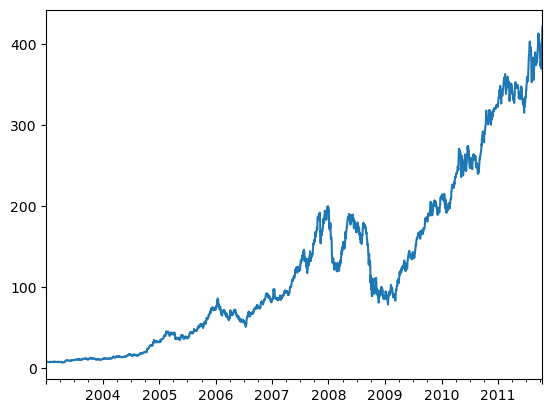

In [214]:
close_px["AAPL"].plot()

<Axes: >

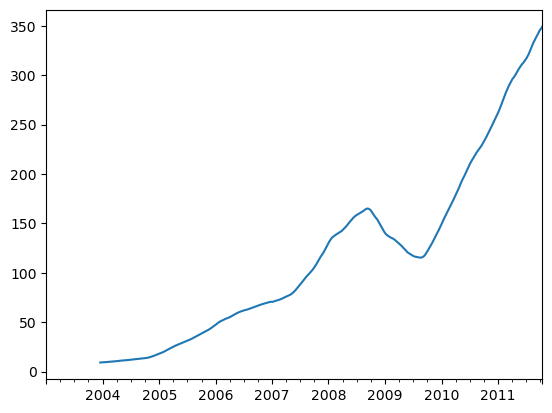

In [220]:
close_px["AAPL"].rolling(250).mean().plot()

<Figure size 640x480 with 0 Axes>

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

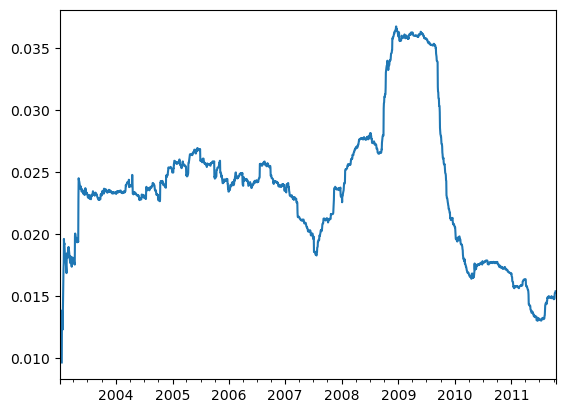

In [224]:
from matplotlib import pyplot as plt
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

In [225]:
expanding_mean = std250.expanding().mean()
expanding_mean

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.023600
2011-10-11    0.023597
2011-10-12    0.023593
2011-10-13    0.023589
2011-10-14    0.023586
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<Axes: >

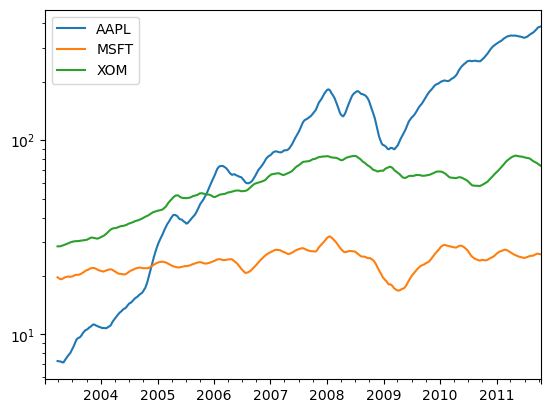

In [226]:
close_px.rolling(60).mean().plot(logy=True)

In [227]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [228]:
appl_px=close_px["AAPL"]["2006":"2007"]
appl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

<Axes: >

<Axes: >

<Axes: >

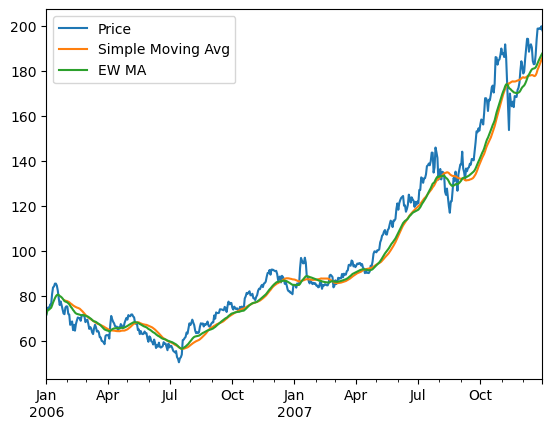

In [229]:
ma30=appl_px.rolling(30,min_periods=20).mean()
ewm30=appl_px.ewm(span=30).mean()
appl_px.plot(label="Price")
ma30.plot(label="Simple Moving Avg")
ewm30.plot(label="EW MA")
plt.legend()

### Binary Moving Window Functions

In [230]:
spx_px=close_px_all["SPX"]
spx_rets=spx_px.pct_change()
returns=close_px.pct_change()

<Axes: >

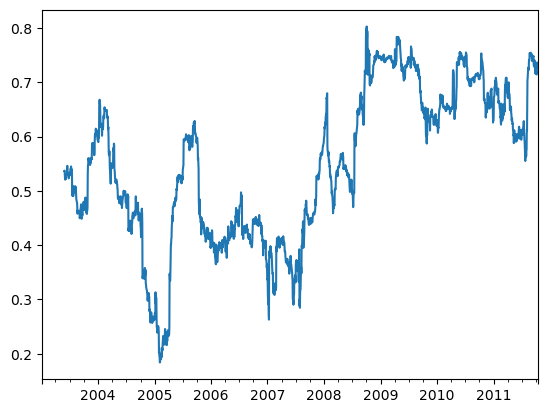

In [231]:
corr=returns["AAPL"].rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

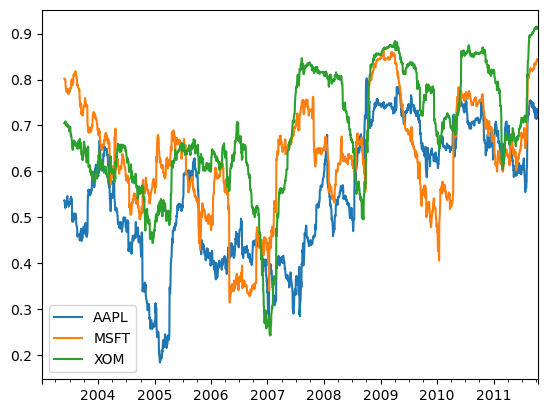

In [232]:
corr=returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [233]:
from scipy.stats import percentileofscore

In [235]:
def score_at_2percent(x):
    return percentileofscore(x,0.02)

2003-01-02     NaN
2003-01-03     NaN
2003-01-06     NaN
2003-01-07     NaN
2003-01-08     NaN
              ... 
2011-10-10    92.4
2011-10-11    92.0
2011-10-12    92.0
2011-10-13    92.0
2011-10-14    91.6
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<Axes: >

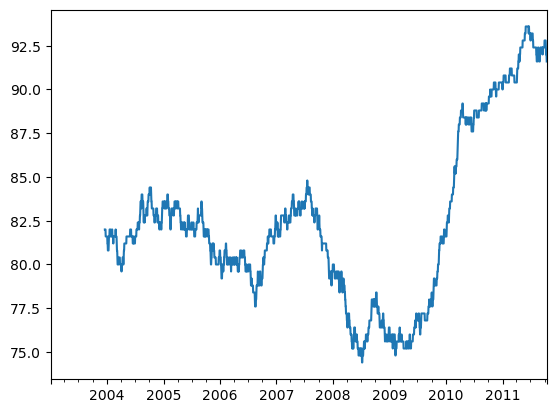

In [237]:
result=returns["AAPL"].rolling(250).apply(score_at_2percent)
result
result.plot()